# Finding Intersection of 2 Lines

We learned to plot a line through 2 points, and we can draw multiple lines in python. How do we solve for the intersection point of the lines?

In [2]:
## Do not change this cell, only execute it. 
## This cell initializes Python so that pandas, numpy and scipy packages are ready to use.

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import scipy as sp
from fractions import Fraction
from scipy.optimize import linprog

## Mathematics

Suppose we have two lines in slope-intercept form:

- $y = m_1 x + b_1$
- $y = m_2 x + b_2$

To find the intersection point, we set $y=y$ and simplify as follows:

$$m_1 x + b_1 = m_2 x + b_2$$

We gather like terms with $m_1,m_2$ to the left side and $b_1,b_2$ to the right:

$$m_1 x - m_2 x = b_2 - b_1$$

Next, we factor on the left:

$$(m_1 - m_2) x = b_2 - b_1$$

Finally, we divide through by the coefficient of $x$, and we have the following (switching to $x_0$ to indicate the specific $x$-value of the intersection point):

$$x_0 = \frac{b_2 - b_1}{m_1 - m_2}$$

To solve for $y_0$, we use the first line above which has sloped $m_1$ and intercept $b_1$:

$$y_0=m_1 x_0 +b_1$$

Thus, the point

$$(x_0, y_0)$$

will be the intersection of the two lines provided they actually intersect.

## Code

To create the code we need, recall that we defined the points in our graphics as follows:

`points = ((1, 4), (5, 3))`
and
`points2 = ( (2, 1) , (5, 5) )`

We first define a function **get_slop-int()** that will take the coordinates of two points as inputs and will caluclate the **slope** and **$y$-intercept**.

In [3]:
def get_slope_int(p1, p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m, b

Now that python know the function, we need to remind it of the points:

In [4]:
points = ((1, 4), (5, 3))
points2 = ( (2, 1) , (5, 5) )

We calculate the slope and intercept for the **first** line as follows:

In [5]:
m1, b1 = get_slope_int(points[0], points[1])

We calculate the slope and intercept for the **second** line as follows:

In [6]:
m2, b2 = get_slope_int(points2[0], points2[1])

Knowing the values $\left\{m_1,m_2,b_1,b_2\right\}$, we perform the calculation derived in the section above.

In [7]:
x_0 = (b2 - b1) / (m1 - m2)
y_0 = m1 * x_0 + b1
print(f"The two lines intersect at the point: ({round(x_0,4)}, {round(y_0,4)})")

The two lines intersect at the point: (3.7368, 3.3158)


We can add these calculations to our graphics where we plotted the two lines. The result will look like thise.

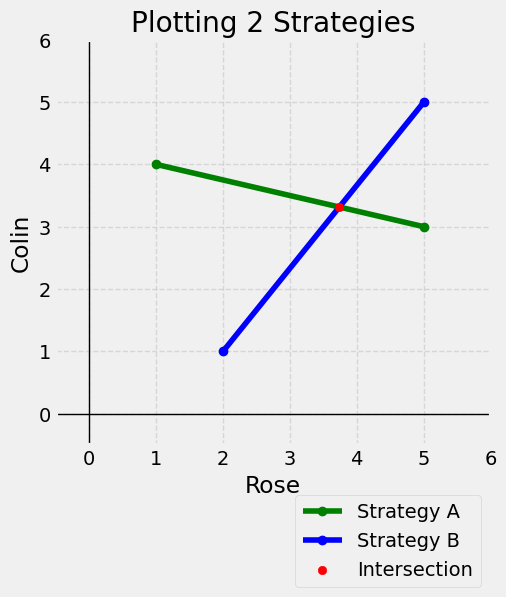

In [10]:
plots.figure(figsize=(5,5))
plots.axhline(0, color='black', linewidth=1)
plots.axvline(0, color='black', linewidth=1)
plots.xlim(-0.5, 6); plots.ylim(-0.5, 6)

points = ((1, 4), (5, 3))
plots.plot(*zip(*points), marker='o', color='green', label='Strategy A')
points2 = ( (2, 1) , (5, 5) )
plots.plot(*zip(*points2), marker='o', color='blue', label='Strategy B')

m1, b1 = get_slope_int(points[0], points[1])
m2, b2 = get_slope_int(points2[0], points2[1])
x_0 = (b2 - b1) / (m1 - m2)
y_0 = m1 * x_0 + b1
plots.scatter(x_0, y_0, color='red',label='Intersection', zorder=3)

# Add labels and title
plots.xlabel('Rose')
plots.ylabel('Colin')
plots.title('Plotting 2 Strategies')

# Add a grid, add legend, and place legend below figure.
plots.grid(True, linestyle='--', alpha=0.7)
plots.legend(loc='upper right', bbox_to_anchor=(1, -0.1),framealpha=0.75)
plots.show()

## Rationalize Values

When python calculates a value, we can force it to remain in exact value mode and produce, where possible, the improper fraction. The code to do this involves the package

<center><b><span style="color:red">fraction</span></b></center>

Notice how, in the code below, we can rationalize the values $(x_0, y_0)$ using the Fraction() function. Rather than a decimal approximation, we retrieve the improper fraction which will often be more helpful in game theory settings.

In [19]:
points = ((1, 4), (5, 3))
points2 = ( (2, 1) , (5, 5) )

m1, b1 = get_slope_int(points[0], points[1])
m2, b2 = get_slope_int(points2[0], points2[1])
x_0 = (b2 - b1) / (m1 - m2)
y_0 = m1 * x_0 + b1

# Rationalize the values
rx = Fraction(x_0).limit_denominator()
ry = Fraction(y_0).limit_denominator()

print(rx, ry)

71/19 63/19


## Final Example: Rationalized Intersection with Updated Label

We can add the rationalized coordinates of the point of intersection into our label and legend with the command:

`label=f'Intersection ({rx}, {ry})'`

Gathering all of the above information, the final graphic of two lines intersecting with the intersection point solved for, rationalized and printed would look like this.

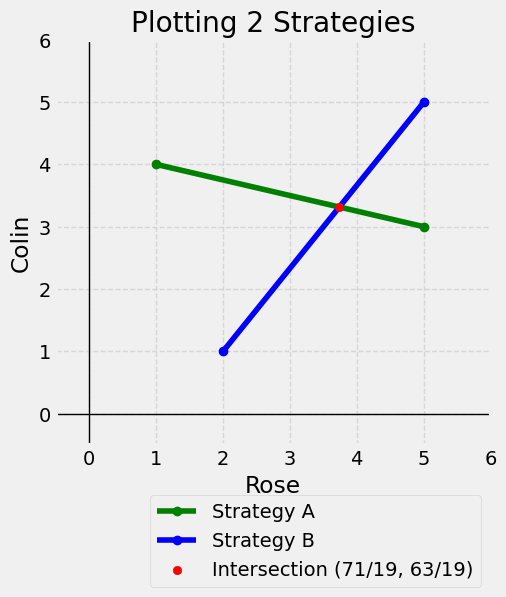

In [21]:
plots.figure(figsize=(5,5))
plots.axhline(0, color='black', linewidth=1)
plots.axvline(0, color='black', linewidth=1)
plots.xlim(-0.5, 6); plots.ylim(-0.5, 6)

points = ((1, 4), (5, 3))
plots.plot(*zip(*points), marker='o', color='green', label='Strategy A')
points2 = ( (2, 1) , (5, 5) )
plots.plot(*zip(*points2), marker='o', color='blue', label='Strategy B')

m1, b1 = get_slope_int(points[0], points[1])
m2, b2 = get_slope_int(points2[0], points2[1])
x_0 = (b2 - b1) / (m1 - m2)
y_0 = m1 * x_0 + b1

# Rationalize the values
rx = Fraction(x_0).limit_denominator()
ry = Fraction(y_0).limit_denominator()
plots.scatter(x_0, y_0, color='red', label=f'Intersection ({rx}, {ry})', zorder=3)

plots.xlabel('Rose')
plots.ylabel('Colin')
plots.title('Plotting 2 Strategies')
plots.grid(True, linestyle='--', alpha=0.7)
plots.legend(loc='upper right', bbox_to_anchor=(1, -0.1),framealpha=0.75)
plots.show()